<B>1. 基本概念</B>

K-means算法是一种基于距离的聚类算法。

采用距离作为相似性的评价指标，即认为两个对象的距离越近，其相似度就越大。

该算法认为类簇是由距离靠近的对象组成的，因此把得到紧凑且独立的簇作为最终目标.

<B>2. 核心思想</B>

通过迭代寻找K个簇的一种划分方案，使得用这K个簇的均值来代表相应各类样本时所得的总体误差最小。

K个簇具有以下特点:各簇本身尽可能的紧凑，而各簇之间尽可能的分开。

K-means算法的基础是最小误差平方和准则，其目标函数是:
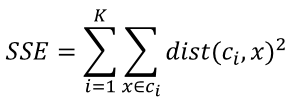

各簇内的样本越相似，其与该类均值间的误差平方越小，对所有类所得到的误差平方求和，即可验证分为K类时，各簇是否是最优的。

<B>3. 数据集</B>

本实验采用二维数据集，共80个样本
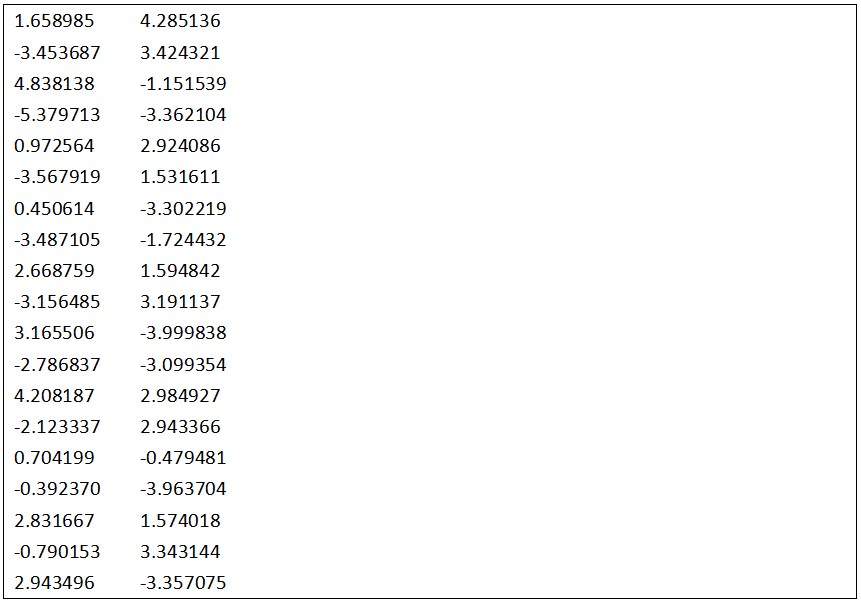

In [1]:
import numpy as np
from numpy import *

In [2]:
#加载数据
def loadDataSet(fileName):
    data = np.loadtxt(fileName, delimiter='\t')
    return data

In [3]:
data = loadDataSet('dataSet.txt')
print(data[:10])  #输出前10个

[[ 1.658985  4.285136]
 [-3.453687  3.424321]
 [ 4.838138 -1.151539]
 [-5.379713 -3.362104]
 [ 0.972564  2.924086]
 [-3.567919  1.531611]
 [ 0.450614 -3.302219]
 [-3.487105 -1.724432]
 [ 2.668759  1.594842]
 [-3.156485  3.191137]]


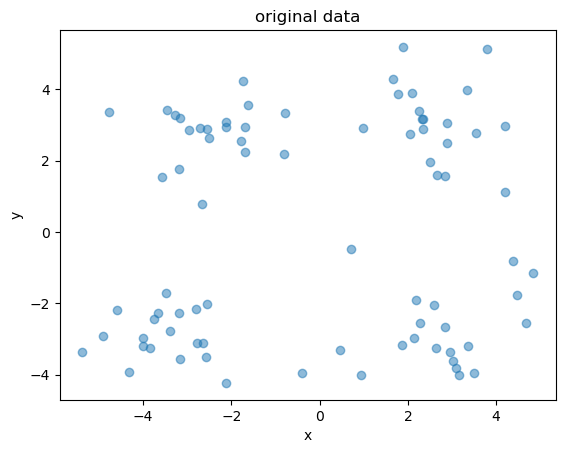

In [4]:
#对数据进行可视化
import matplotlib.pyplot as plt
x = data[:,0]
y = data[:,1]

plt.title('original data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y,alpha=0.5)

In [5]:
#计算欧氏距离
def distEclid(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))    #计算两个对象之间的距离

In [6]:
#构建簇的质心，取k个随机质心，返回的数组中保存有初始质心的坐标
def randCent(dataSet, k):
    n = np.shape(dataSet)[1]
    centroids = np.zeros((k, n))  # 总共k个质心，每个质心有n个坐标值
    for j in range(n):
        minJ = np.min(dataSet[:, j])
        maxJ = np.max(dataSet[:, j])
        rangeJ = float(maxJ - minJ)
        centroids[:, j] = minJ + rangeJ * np.random.rand(k)
    return centroids

In [20]:
# k-means 聚类算法
def kMeans(dataSet, k, distMeans=distEclid, createCent=randCent):
    m, n = dataSet.shape
    clusterAssment = np.zeros((m, 2))   # 用于存放该样本属于哪簇及到质心距离
    centroids = createCent(dataSet, k)
    clusterChanged = True  # 用来判断聚类是否已经收敛
    while clusterChanged:
        clusterChanged = False
        for i in range(0, m):
            distances = [distMeans(dataSet[i],centroids[j]) for j in range(k)]
            minIndex = np.argmin(distances)
            if minIndex != clusterAssment[i, 0]:
                clusterChanged = True
            clusterAssment[i] = minIndex, distances[minIndex]
        for p in range(0, k):
            points = dataSet[clusterAssment[:, 0] == p]
            centroids[p] = np.mean(points, axis = 0)
    return centroids, clusterAssment


In [21]:
#输出聚类结果
centroids, clusterAssment = kMeans(data, 4) 
print("Final centroids:\n", centroids)  #最终的聚类中心
print("Cluster assignment:\n", clusterAssment)  #每个样本被分配的簇标号，以及到聚类中心的距离

Final centroids:
 [[ 2.6265303   3.10868015]
 [ 2.80293085 -2.7319146 ]
 [-3.38237045 -2.9473363 ]
 [-2.46154315  2.78737555]]
Cluster assignment:
 [[0.         1.52321774]
 [3.         1.17900336]
 [1.         2.57675284]
 [2.         2.03995331]
 [0.         1.66423542]
 [3.         1.67362246]
 [1.         2.42046311]
 [2.         1.22738105]
 [0.         1.51442702]
 [3.         0.80372102]
 [1.         1.3187458 ]
 [2.         0.61462954]
 [0.         1.58649071]
 [3.         0.37244653]
 [1.         3.07865758]
 [2.         3.15802248]
 [0.         1.54831165]
 [3.         1.76136981]
 [1.         0.64076836]
 [2.         0.68912321]
 [0.         0.37243303]
 [3.         0.71431155]
 [1.         1.02842711]
 [2.         0.17034724]
 [0.         1.14717554]
 [3.         0.95299726]
 [1.         0.70933098]
 [2.         0.67671465]
 [0.         0.46237097]
 [3.         2.01403167]
 [1.         2.26730796]
 [2.         0.74581331]
 [0.         0.6900313 ]
 [3.         1.24263474]
 [

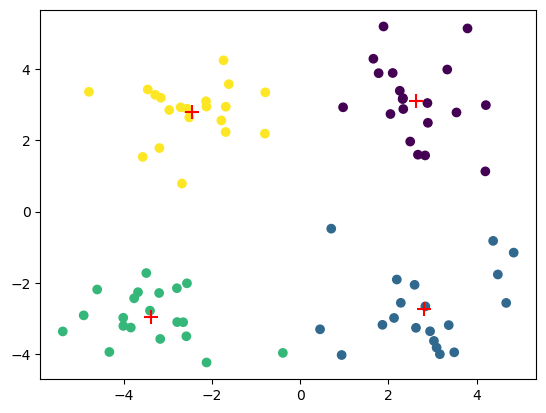

In [30]:
#对聚类结果进行可视化
plt.scatter(x, y, c=clusterAssment[:,0])
plt.scatter(centroids[:,0], centroids[:,1], color='r',s=100,marker='+')

In [28]:
#计算轮廓系数指标
from sklearn.metrics import silhouette_score
score = silhouette_score(data, clusterAssment[:,0] , metric='euclidean')
score

0.6558088638339109